In [1]:
from qiskit import *

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)

In [3]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

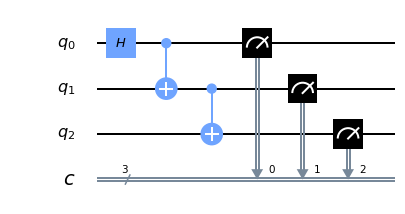

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [6]:
from qiskit.visualization import plot_histogram

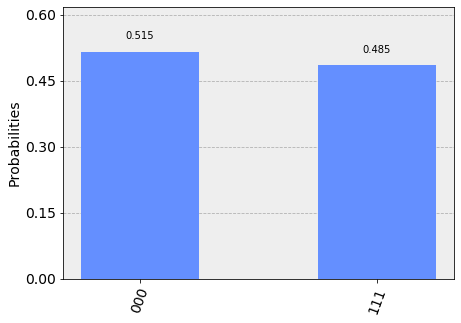

In [7]:
plot_histogram(sim_result.get_counts(circuit))

In [10]:
IBMQ.load_account()

/Users/george/anaconda3/envs/quantum/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [17]:
job = execute(circuit, backend=device, shots=1024)
print("Job ID:", job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5da2fba9194ed40018474363
Job Status: job is queued (165)   

KeyboardInterrupt: 

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter))

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel='measerrormitigationcal')

In [ ]:
cal_circuits[2].draw(output='mpl')